nn.optim中包含了各种常见的优化算法，包括**随机梯度下降算法SGD（Stochastic Gradient Descent，随机梯度下降）**、**Adam（Adaptive Moment Estimation）**、Adagrad、RMSProp，这里仅对常用的SGD与Adam两种算法进行详细介绍。

## 1.SGD方法
梯度下降（Gradient Descent）是迭代法中的一种，是指沿着梯度下降的方向求解极小值，一般可用于求解最小二乘问题。在深度学习中，当前更常用的是SGD算法，以一个小批次（Mini Batch）的数据为单位，计算一个批次的梯度，然后反向传播优化，并更新参数。SGD的表达式如式（2-1）与式（2-2）所示。公式中，gt代表了参数的梯度，η代表了学习率（LearningRate），即梯度影响参数更新的程度，是训练中非常重要的一个超参数。

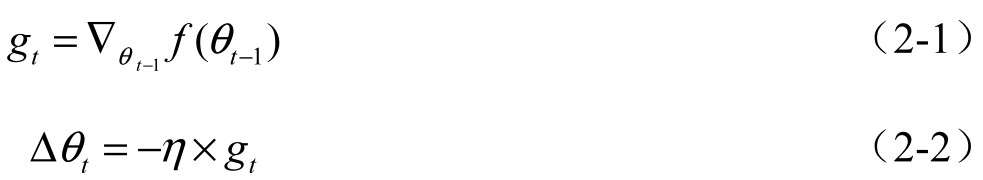

### SGD优化算法的好处主要有两点：
①分担训练压力：当前数据集通常数量较多，尺度较大，使用较大的数据同时训练显然不现实，SGD则提供了小批量训练并优化网络的方法，有效分担了GPU等计算硬件的压力。
②加快收敛：由于SGD一次只采用少量的数据，这意味着会有更多次的梯度更新，在某些数据集中，其收敛速度会更快。

### SGD也有其自身的缺点：
①初始学习率难以确定：SGD算法依赖于一个较好的初始学习率，但设置初始学习率并不直观，并且对于不同的任务，其初始值也不固定。②容易陷入局部最优：SGD虽然采用了小步快走的思想，但是容易陷入局部的最优解，难以跳出。

有效解决局部最优的通常做法是增加动量（momentum），其概念来自于物理学，在此是指更新的时候一定程度上保留之前更新的方向，同时利用当前批次的梯度进行微调，得到最终的梯度，可以增加优化的稳定性，降低陷入局部最优难以跳出的风险。其函数如式（2-3）与式（2-4）所示。

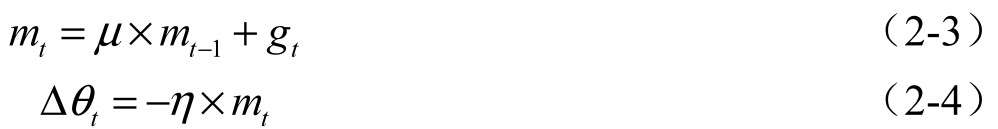

公式中的μ为动量因子，当此次梯度下降方向与上次相同时，梯度会变大，也就会加速收敛。当梯度方向不同时，梯度会变小，从而抑制梯度更新的震荡，增加稳定性。在训练的中后期，梯度会在局部极小值周围震荡，此时gt接近于0，但动量的存在使得梯度更新并不是0，从而有可能跳出局部最优解。

## 2.Adam方法
在SGD之外，Adam是另一个较为常见的优化算法。Adam利用了梯度的一阶矩与二阶矩动态地估计调整每一个参数的学习率，是一种学习率自适应算法。**Adam的优点在于，经过调整后，每一次迭代的学习率都在一个确定范围内，使得参数更新更加平稳。此外，Adam算法可以使模型更快收敛，尤其适用于一些深层网络，或者神经网络较为复杂的场景。**

In [1]:
#利用PyTorch来搭建常用的优化器，传入参数包括网络中需要学习优化的Tensor对象、学习率和权值衰减等
import torch
from mlp import MLP
from torch import optim
from torch import nn

In [2]:
#model由3个全连接层组成
model = MLP(28*28, 300, 200, 10)
model

MLP(
  (layer): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): ReLU()
    (2): Linear(in_features=300, out_features=200, bias=True)
    (3): ReLU()
    (4): Linear(in_features=200, out_features=10, bias=True)
    (5): ReLU()
  )
)

In [3]:
#采用SGD优化器，学习率为0.01
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
data = torch.randn(10, 28*28)
output = model(data)
output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0165, 0.0921, 0.0502, 0.0000,
         0.0216],
        [0.0715, 0.0335, 0.0000, 0.0000, 0.0000, 0.0000, 0.1221, 0.0768, 0.0386,
         0.0000],
        [0.0000, 0.0000, 0.0130, 0.0000, 0.0000, 0.0423, 0.0579, 0.1351, 0.0000,
         0.0252],
        [0.0000, 0.1057, 0.0063, 0.0000, 0.0000, 0.0161, 0.0000, 0.1868, 0.0787,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1435, 0.0796, 0.1034,
         0.0000],
        [0.0028, 0.0000, 0.0000, 0.0194, 0.0000, 0.0000, 0.0044, 0.1749, 0.0234,
         0.0000],
        [0.0000, 0.0392, 0.0000, 0.0000, 0.0000, 0.1208, 0.0985, 0.0938, 0.0000,
         0.0160],
        [0.0488, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0760, 0.0426, 0.1185,
         0.2591],
        [0.0000, 0.0148, 0.0000, 0.0000, 0.0000, 0.0000, 0.0753, 0.1790, 0.0105,
         0.0892],
        [0.0028, 0.0000, 0.0000, 0.0000, 0.0000, 0.0067, 0.0000, 0.1825, 0.0347,
         0.0000]], grad_fn=<

In [4]:
#由于是10分类，因此label元素从0到9，一共10个样本
label = torch.Tensor([1,0,4,7,9,3,4,5,3,2]).long()
label

tensor([1, 0, 4, 7, 9, 3, 4, 5, 3, 2])

In [5]:
#求交叉熵损失
critertion = nn.CrossEntropyLoss()
loss = critertion(output, label)
loss

tensor(2.3087, grad_fn=<NllLossBackward0>)

In [6]:
#清空梯度，在每次优化前都需要进行此操作
optimizer.zero_grad()

In [7]:
#损失的反向传播
loss.backward()

In [8]:
#利用优化器进行梯度更新
optimizer.step()

### 对于训练过程中的学习率调整，需要注意以下两点：
①不同参数层分配不同的学习率：优化器也可以很方便地实现将不同的网络层分配成不同的学习率，即对于特殊的层单独赋予学习率，其余的保持默认的整体学习率，具体示例如下：

In [ ]:
#对于model中需要单独赋予学习率的层，如special层，则使用'lr'关键字单独赋予
optimizer = optim.SGD(
    {'params': model.special.parameters(), 'lr': 0.001},
    {'params': model.base.parameters()}, lr=0.0001)

②学习率动态调整：对于训练过程中动态的调整学习率，可以在迭代次数超过一定值后，重新赋予optim优化器新的学习率。